### Image Classification on CIFAR-10 with Data Augmentation

This project focuses on classifying images from the CIFAR-10 dataset using Convolutional Neural Networks (CNNs). The CIFAR-10 dataset consists of 60,000 32x32 color images across 10 different classes, such as airplanes, cars, birds, cats, and more.

To improve the model’s generalization and robustness, we apply data augmentation techniques including random cropping, flipping, rotation, and normalization. These transformations help simulate real-world variations and prevent overfitting.

The goal of this notebook is to:
- Explore the CIFAR-10 dataset
- Build and train a CNN model
- Apply data augmentation to improve performance
- Evaluate the model using accuracy and loss metrics

In [1]:

# CIFAR-10 Classification with Data Augmentation and Model Optimization

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


In [3]:
# 1. Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values (0-255 -> 0-1)
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)


In [4]:
# 2. Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)
datagen.fit(x_train)  # Fit augmentation generator on training data

In [5]:
# 3. Build a CNN model with optimizations
def build_model():
    model = models.Sequential()

    # First conv block
    model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(32, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.2))

    # Second conv block
    model.add(layers.Conv2D(64, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(64, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.3))

    # Third conv block
    model.add(layers.Conv2D(128, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(128, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.4))

    # Fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))

    return model

In [6]:
model = build_model()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# 4. Callbacks for early stopping and saving best model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_cifar_model.h5', save_best_only=True, monitor='val_accuracy')


In [8]:
# 5. Train the model with augmented data
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=100,
    validation_data=(x_test, y_test),
    callbacks=[early_stop, checkpoint]
)

Epoch 1/100
782/782 [==============================] - 313s 391ms/step - loss: 1.6529 - accuracy: 0.4064 - val_loss: 1.3613 - val_accuracy: 0.5200
Epoch 2/100
782/782 [==============================] - 307s 392ms/step - loss: 1.2461 - accuracy: 0.5554 - val_loss: 1.0518 - val_accuracy: 0.6243
Epoch 3/100
782/782 [==============================] - 295s 377ms/step - loss: 1.0856 - accuracy: 0.6153 - val_loss: 0.9491 - val_accuracy: 0.6608
Epoch 4/100
782/782 [==============================] - 4578s 6s/step - loss: 0.9813 - accuracy: 0.6598 - val_loss: 0.9298 - val_accuracy: 0.6810
Epoch 5/100
782/782 [==============================] - 287s 366ms/step - loss: 0.9130 - accuracy: 0.6835 - val_loss: 1.0865 - val_accuracy: 0.6396
Epoch 6/100
782/782 [==============================] - 308s 394ms/step - loss: 0.8682 - accuracy: 0.7009 - val_loss: 0.7538 - val_accuracy: 0.7321
Epoch 7/100
782/782 [==============================] - 1287s 2s/step - loss: 0.8287 - accuracy: 0.7151 - val_loss: 0.757

In [9]:
# 6. Evaluate the final model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")


313/313 - 9s - loss: 0.3299 - accuracy: 0.8922 - 9s/epoch - 29ms/step
Test accuracy: 0.8922


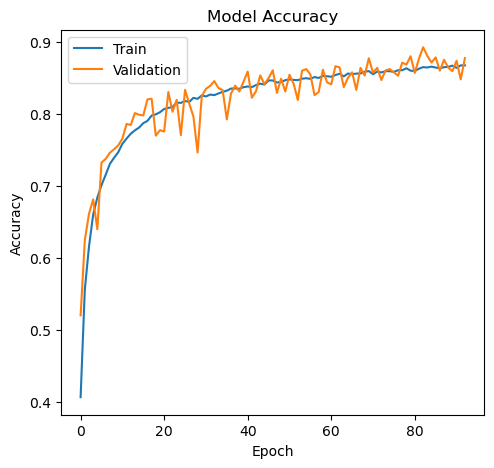

In [10]:
# 7. Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


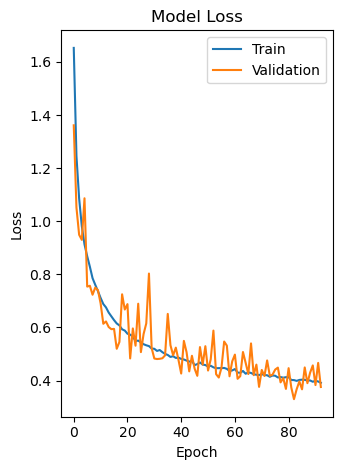

In [11]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()